In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict, plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("./data/revised_dataset.csv", sep=";")
df

,Latence1,Latence2,Latence3,CPU1,RAM1,CPU2,RAM2,CPU3,RAM3,Coord1,Coord2,CoordCar1,CoordCar2
0,0.485147,0.224793,0.123825,0.41,0.4,0.22,0.4,0.59,0.6,3,4,3,2
1,0.157996,0.132488,0.352909,0.23,0.3,0.72,0.5,0.96,0.7,3,3,2,2
2,0.446919,0.165703,0.292357,0.20,0.4,0.96,0.3,0.38,0.5,4,4,2,2
3,0.186139,0.136990,0.285675,0.33,0.4,0.95,0.4,0.72,0.4,2,2,3,4
4,0.063124,0.185189,0.285847,0.12,0.7,0.34,0.8,0.31,0.4,2,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.498866,0.108905,0.233510,0.66,0.6,0.27,0.5,0.22,0.7,2,5,3,5
39996,0.185063,0.263481,0.342320,0.63,0.5,0.23,0.4,0.36,0.6,4,1,2,5
39997,0.139821,0.190989,0.180538,0.46,0.7,0.13,0.3,0.28,0.4,1,4,3,1
39998,0.083778,0.273237,0.289394,0.68,0.5,0.21,0.4,0.27,0.5,4,5,2,4


In [33]:
rawdf = pd.read_csv("./data/revised_dataset.csv", sep=";")

df = rawdf[["Latence1"]].head(500)
rowNumber = len(df.index)
trainingSampleSize = int(rowNumber*0.8)
dfArima = df.head(trainingSampleSize)

In [34]:
cor = rawdf.corr().head(1)
cor

,Latence1,Latence2,Latence3,CPU1,RAM1,CPU2,RAM2,CPU3,RAM3,Coord1,Coord2,CoordCar1,CoordCar2
Latence1,1.0,-0.002561,-0.010283,0.001867,0.004139,0.001705,-0.006823,-0.003165,-0.000332,-0.000955,0.003784,-0.000446,-0.005329


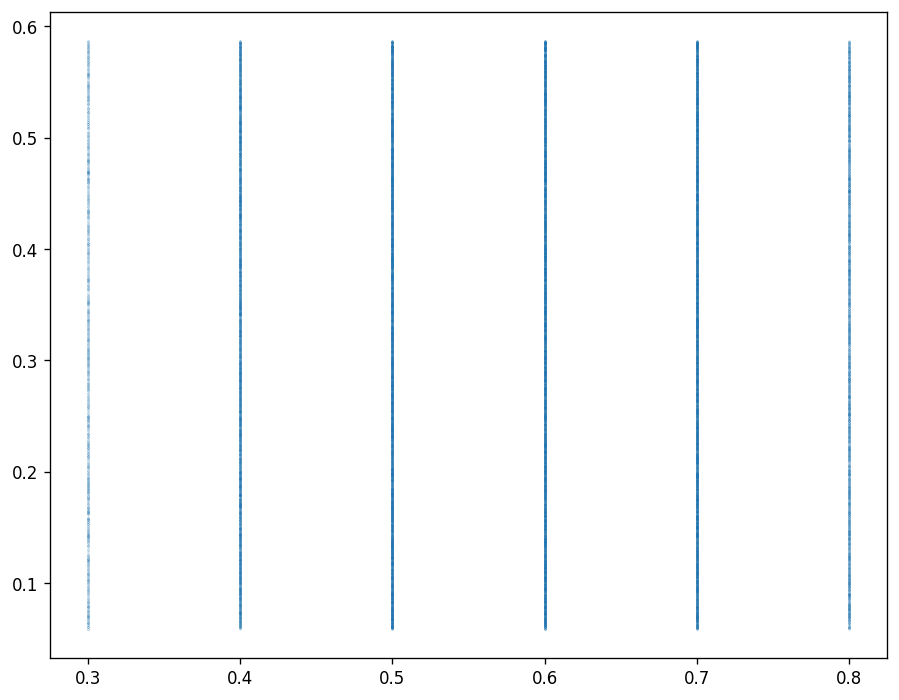

In [35]:
plt.scatter(rawdf['RAM1'], rawdf['Latence1'], s=0.002)
plt.show()

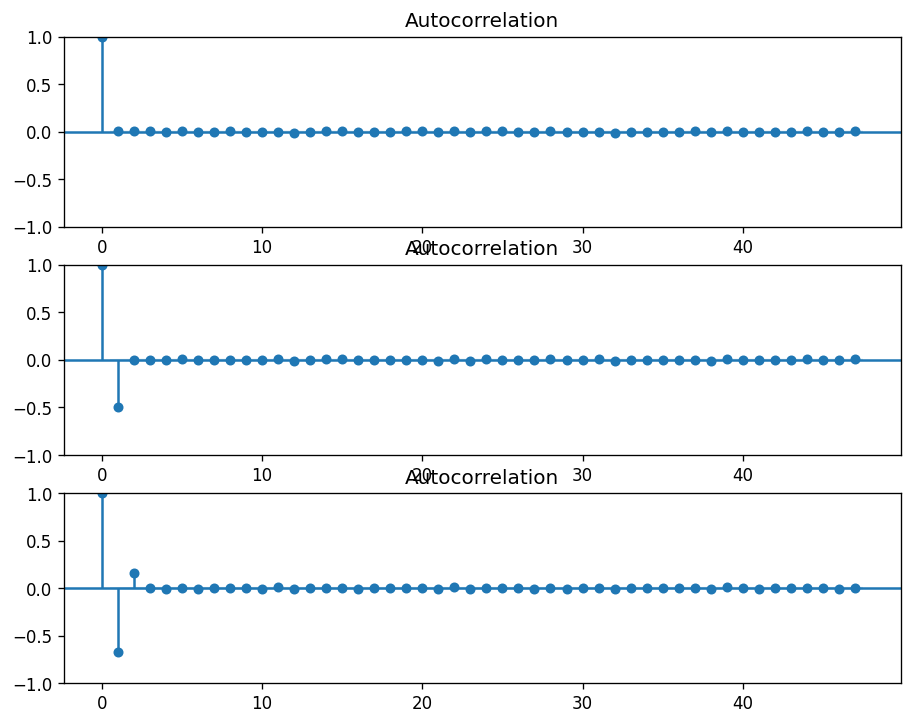

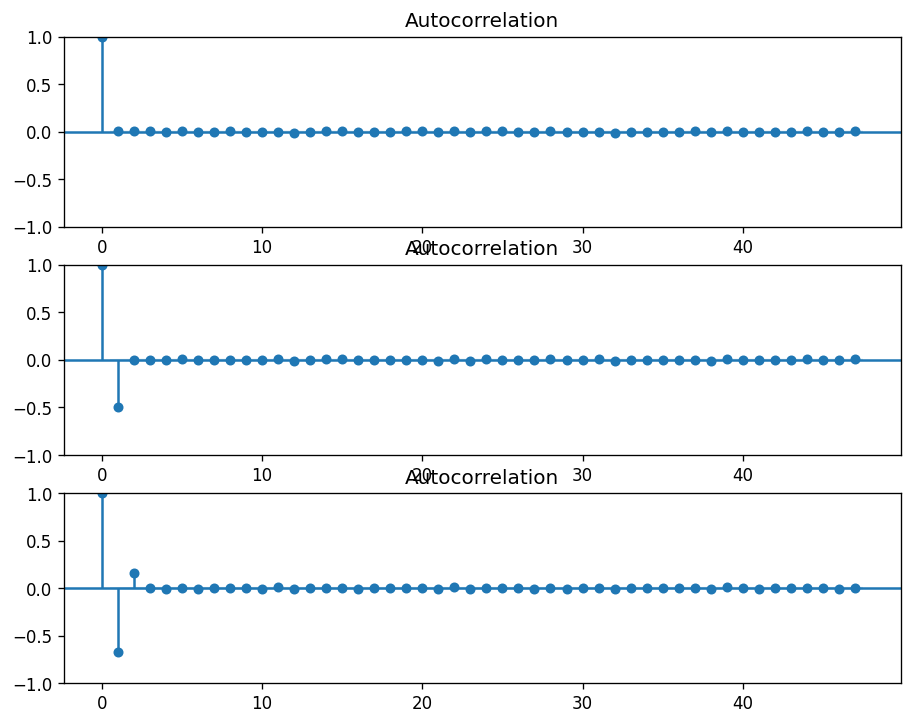

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(rawdf.Latence1, ax=ax1)
plot_acf(rawdf.Latence1.diff().dropna(), ax=ax2)
plot_acf(rawdf.Latence1.diff().diff().dropna(), ax=ax3)


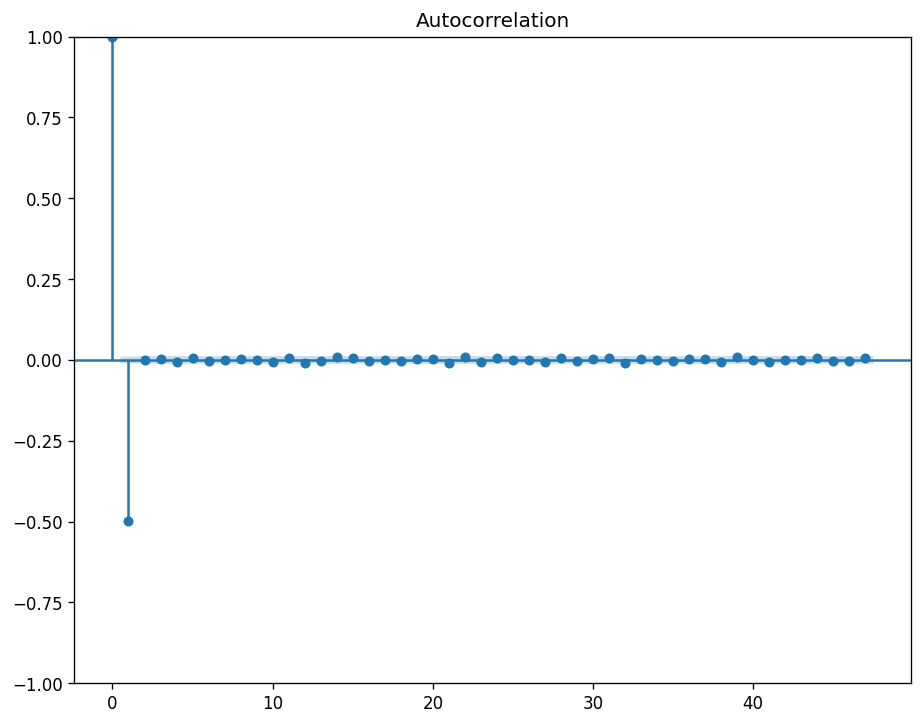

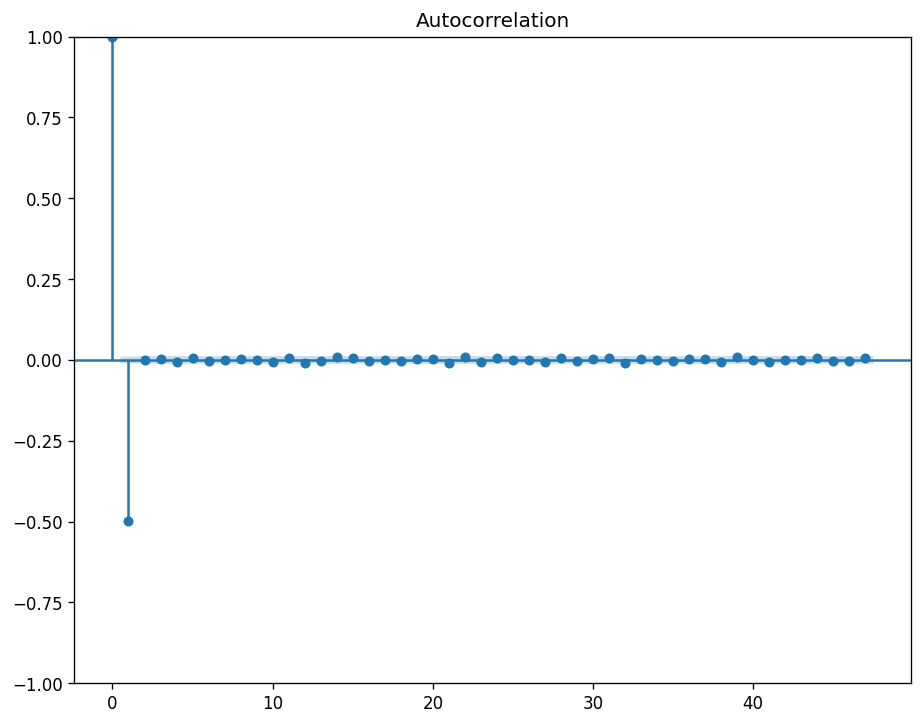

In [49]:
plot_acf(rawdf.Latence1.diff().dropna())

In [13]:
modArima = ARIMA(dfArima.Latence1, order=(2, 1, 2))
model = modArima.fit()

predictions = pd.Series(model.forecast(rowNumber - trainingSampleSize))

print(predictions.index)
bonnesVal = df.Latence1[-(rowNumber - trainingSampleSize):]
print(bonnesVal.index)

RangeIndex(start=400, stop=500, step=1)
RangeIndex(start=400, stop=500, step=1)


C:\Users\probook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Pour recuperer la RMSE
rmse = np.mean((predictions - bonnesVal)**2)**0.5
type(predictions)

pandas.core.series.Series

In [15]:
import random
mindf = rawdf["Latence1"].min()
maxdf = rawdf["Latence1"].max()
listPredRandom = []
for _ in range(rawdf.shape[0]):
    listPredRandom.append(np.random.normal((mindf+maxdf)/2, 0.00))


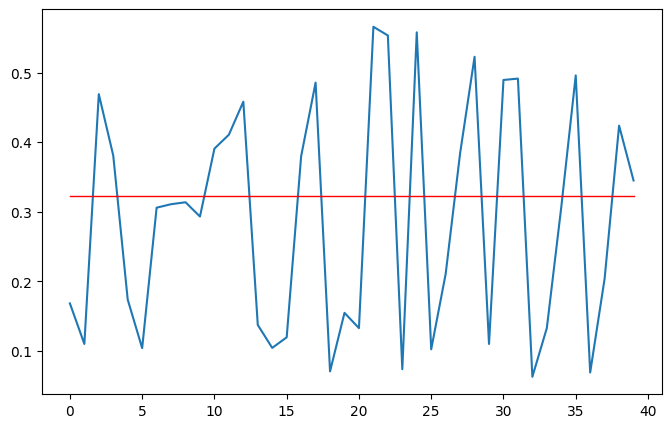

0.14863248831054776

In [16]:
predRand = pd.Series(listPredRandom)
rmse = np.mean((predRand - bonnesVal)**2)**0.5
plt.figure(num = 3, figsize=(8, 5))
rangeeee = range(40)
plt.plot(rangeeee, rawdf["Latence1"].head(40))
plt.plot(rangeeee, predRand[0:40], 
         color='red',   
         linewidth=1.0)
plt.show()
rmse

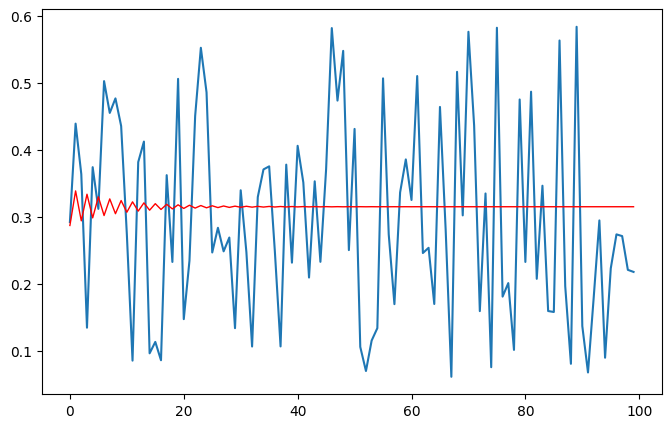

In [17]:
#Displaying predictions and actual values

x_axis = range(rowNumber - trainingSampleSize)

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x_axis, bonnesVal)
plt.plot(x_axis, predictions, 
         color='red',   
         linewidth=1.0)
plt.show()

In [54]:
# On teste l'ARIMA incrémental

df = pd.read_csv("./data/revised_dataset.csv", sep=";")

df = df[["Latence1"]]
totalRowNumber = len(df.index)
numberOfValueToPredictPerIteration = 10
trainingSampleSize = 40   # On decide de ne prendre que les 40 premieres valeurs pour entrainer le modele
numberOfIteration = int((totalRowNumber-trainingSampleSize)/numberOfValueToPredictPerIteration)
dfArima = df.head(trainingSampleSize)

predictedValues = dfArima["Latence1"].tolist()

listRealValues = df["Latence1"].tolist()

print(len(listRealValues[0:40]))

for i in range(1):
    modArima = ARIMA(listRealValues[10*i:10*i+40], order=(4, 2, 4))
    model = modArima.fit()
    predictedValues = predictedValues + model.forecast(numberOfValueToPredictPerIteration).tolist()



40


C:\Users\probook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
len(predictedValues)

20000

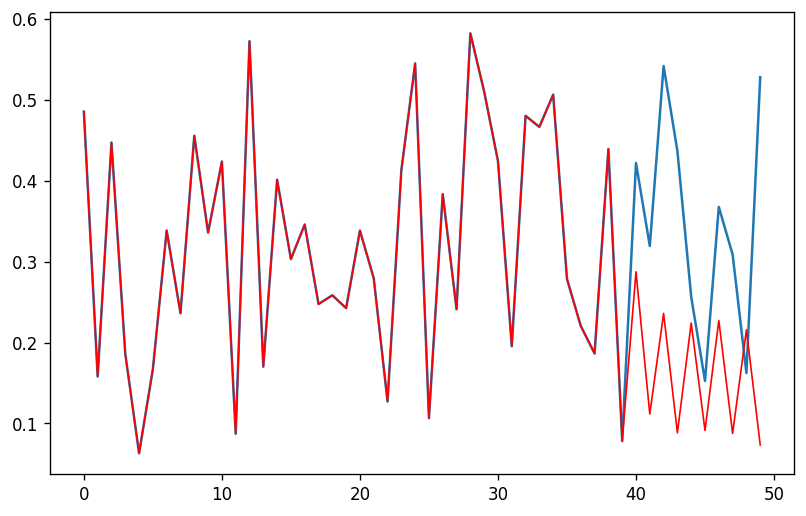

In [55]:

#Displaying predictions and actual values

borneInf = 0
borneMax = 50

x_axis = range(borneMax-borneInf)

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x_axis, listRealValues[borneInf:borneMax])
plt.plot(x_axis, predictedValues[borneInf:borneMax], 
         color='red',   
         linewidth=1.0)
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(listRealValues, predictedValues, squared=False)
rms

0.1682483026712648